<a href="https://colab.research.google.com/github/Hassan-zeidan/Statistics-for-Data-Science/blob/main/Week%204/Assignment%201/Construct_Confidence_Intervals_for_Regression_Coefficients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Hassan-zeidan/Statistics-for-Data-Science/main/Week%204/Assignment%201/SOCR-HeightWeight.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [3]:
df = df.rename(columns={"Height(Inches)": "height_in", "Weight(Pounds)": "weight_lb"})
df[["height_in", "weight_lb"]] = df[["height_in", "weight_lb"]].apply(pd.to_numeric, errors="coerce")
print(df[["height_in", "weight_lb"]].describe())

          height_in     weight_lb
count  25000.000000  25000.000000
mean      67.993114    127.079421
std        1.901679     11.660898
min       60.278360     78.014760
25%       66.704397    119.308675
50%       67.995700    127.157750
75%       69.272958    134.892850
max       75.152800    170.924000


In [4]:
df.head()

,Index,height_in,weight_lb
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [17]:
X = df[["height_in"]]    # height as 2D (predictor)
y = df["weight_lb"]      # weight as 1D (response)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [19]:
beta_0 = model.intercept_
beta_1 = model.coef_[0]
print(f"ŷ = {beta_0:.2f} + {beta_1:.2f} x")

ŷ = -82.58 + 3.08 x


In [20]:
from scipy.stats import t
x = X.iloc[:, 0].to_numpy()           # take the single predictor column as a 1D array
yhat = model.predict(X)       # fitted values y hat from the model
resid = y.to_numpy() - yhat        # residuals = actual y - predicted y hat

n = x.size                            # sample size
Sxx = np.sum((x - x.mean())**2)      # sum of squares of x about its mean
RSS = np.sum(resid**2)                # residual sum of squares

s2 = RSS / (n - 2)                    # estimate of error variance
SE_b1 = np.sqrt(s2) / np.sqrt(Sxx)    # standard error

b1 = model.coef_[0]                   # slope estimate B1
t_star = t.ppf(0.975, df=n-2)         # t* for 95% CI (two-sided): 0.975 quantile with n-2 df

ci_low  = b1 - t_star * SE_b1         # lower bound of 95% CI
ci_high = b1 + t_star * SE_b1         # upper bound of 95% CI

print(f"b1 (slope) = {b1:.6f}")
print(f"SE(b1)= {SE_b1:.6f}")
print(f"95% CI = ({ci_low:.6f}, {ci_high:.6f})")

b1 (slope) = 3.083476
SE(b1)= 0.033523
95% CI = (3.017770, 3.149183)


Based on our sample, we are 95% confident that in the underlying population, each additional inch of height is associated with an average increase in weight between about 3.02 and 3.15 pounds.

In [21]:
for conf in [0.90, 0.95, 0.99]:
    alpha  = 1 - conf
    t_star = t.ppf(1 - alpha/2, df=n-2)
    lo = b1 - t_star * SE_b1
    hi = b1 + t_star * SE_b1
    print(f"{int(conf*100)}% CI for slope: ({lo:.6f}, {hi:.6f}) [t*={t_star:.4f}]")

90% CI for slope: (3.028334, 3.138619) [t*=1.6449]
95% CI for slope: (3.017770, 3.149183) [t*=1.9601]
99% CI for slope: (2.997121, 3.169832) [t*=2.5760]


As we move from 90 percent to 95 percent to 99 percent confidence, the critical t value gets bigger and the confidence interval becomes wider. The center of each interval stays at the same slope estimate, about 3.0835 pounds per inch. The 90 percent interval is the narrowest, the 95 percent interval is a bit wider, and the 99 percent interval is the widest. All three intervals are entirely above zero, which means taller people tend to weigh more on average, and this result is statistically meaningful at all three confidence levels.

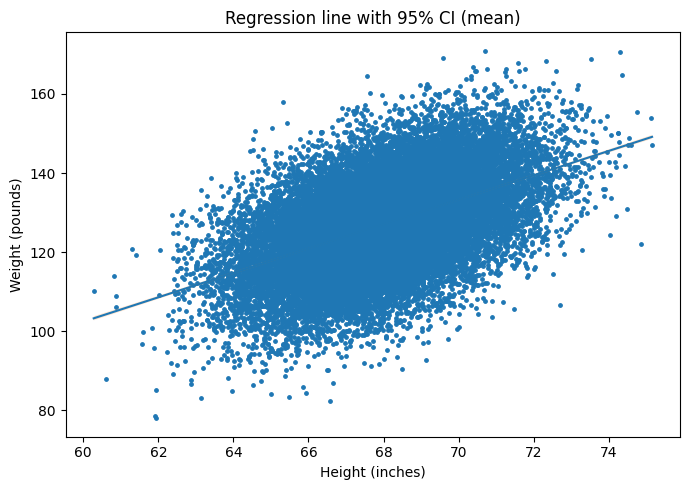

In [22]:
x = X.values.ravel()
y = y.to_numpy()
n = x.size

yhat = model.predict(X).ravel()
resid = y - yhat
s = np.sqrt((resid**2).sum() / (n - 2))

xbar = x.mean()
Sxx = ((x - xbar)**2).sum()
t_star = t.ppf(0.975, df=n-2)  # 95% CI

xg = np.linspace(x.min(), x.max(), 200)
yline = model.predict(xg.reshape(-1, 1)).ravel()
se_mean = s * np.sqrt(1/n + (xg - xbar)**2 / Sxx)
lo, hi = yline - t_star*se_mean, yline + t_star*se_mean

plt.figure(figsize=(7,5))
plt.scatter(x, y, s=6)
plt.plot(xg, yline)
plt.fill_between(xg, lo, hi, alpha=0.2)
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.title("Regression line with 95% CI (mean)")
plt.tight_layout()
plt.show()